In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('dataset_mood_smartphone.csv')
df = df.drop(columns=['Unnamed: 0'])
stats = df.groupby('variable')['value'].describe()
#latex_table = stats.to_latex()
stats


,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
activity,22965.0,0.115958,0.186946,0.000,0.00000,0.021739,0.158333,1.000
appCat.builtin,91288.0,18.538262,415.989243,-82798.871,2.02000,4.038000,9.922000,33960.246
appCat.communication,74276.0,43.343792,128.912750,0.006,5.21800,16.225500,45.475750,9830.777
appCat.entertainment,27125.0,37.576480,262.960476,-0.011,1.33400,3.391000,14.922000,32148.677
appCat.finance,939.0,21.755251,39.218361,0.131,4.07200,8.026000,20.155000,355.513
appCat.game,813.0,128.391615,327.145246,1.003,14.14800,43.168000,123.625000,5491.793
appCat.office,5642.0,22.578892,449.601382,0.003,2.00400,3.106000,8.043750,32708.818
appCat.other,7650.0,25.810839,112.781355,0.014,7.01900,10.028000,16.829250,3892.038
appCat.social,19145.0,72.401906,261.551846,0.094,9.03000,28.466000,75.372000,30000.906


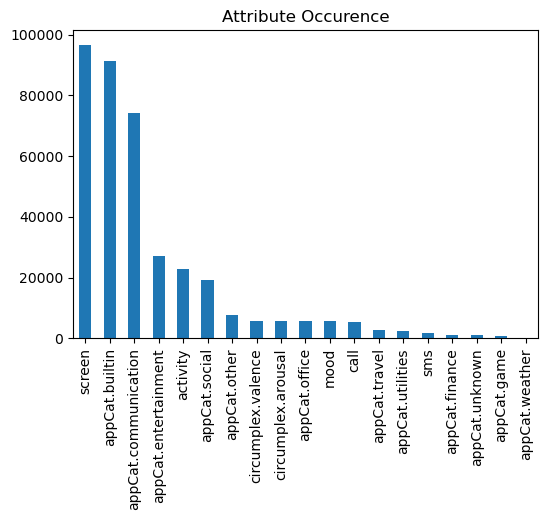

In [3]:
pd.DataFrame(df.variable.value_counts()).plot.bar(title="Attribute Occurence", legend=None,figsize=(6,4));

In [4]:
unique_ids = df['id'].nunique()
print(unique_ids)

27


In [5]:
df = pd.read_csv('dataset_mood_smartphone.csv')
df = df.drop(columns=['Unnamed: 0'])
df.loc[(df['variable'] == 'appCat.builtin') & (df['value'] < 0), 'value'] = 0
df.loc[(df['variable'] == 'appCat.entertainment') & (df['value'] < 0), 'value'] = 0
df['time'] =  (pd.to_datetime(df['time'], infer_datetime_format=True)).dt.floor('d')
day_average = df.groupby(['id','variable','time'], as_index=False, group_keys=True).mean()
#test = day_average[day_average['id']=='AS14.01']
pivoted = day_average.pivot(index=["id", "time"], columns="variable", values="value").reset_index()
pivoted


variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
3,AS14.01,2014-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
4,AS14.01,2014-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,8.545776,59.382943,62.347000,NaN,NaN,NaN,17.835750,...,NaN,NaN,18.724333,NaN,1.0,-0.600000,0.4,6.2,113.607750,1.0
1969,AS14.33,2014-05-28,0.103301,9.590398,37.238750,43.907571,NaN,NaN,44.738625,27.891895,...,NaN,NaN,5.111000,NaN,1.0,0.000000,1.2,8.2,113.657683,1.0
1970,AS14.33,2014-05-29,0.169354,6.452161,54.388125,68.369000,NaN,NaN,NaN,9.734000,...,0.939000,NaN,1.599500,NaN,1.0,-1.333333,1.0,7.0,118.978033,1.0
1971,AS14.33,2014-05-30,0.192901,14.776845,46.412278,37.174286,NaN,NaN,NaN,10.522000,...,37.594571,2.690667,15.521667,NaN,1.0,-0.800000,-0.4,6.8,86.342245,NaN


In [6]:
missing_values = pivoted.isna().sum()
total_values = pivoted.count()
missing_total_values = pd.concat([missing_values, total_values], axis=1, keys=['Missing Values', 'Existing Values'])
print(missing_total_values)

                      Missing Values  Existing Values
variable                                             
id                                 0             1973
time                               0             1973
activity                         785             1188
appCat.builtin                   778             1195
appCat.communication             790             1183
appCat.entertainment            1123              850
appCat.finance                  1766              207
appCat.game                     1780              193
appCat.office                   1697              276
appCat.other                     853             1120
appCat.social                    985              988
appCat.travel                   1544              429
appCat.unknown                  1709              264
appCat.utilities                1540              433
appCat.weather                  1860              113
call                             635             1338
circumplex.arousal          

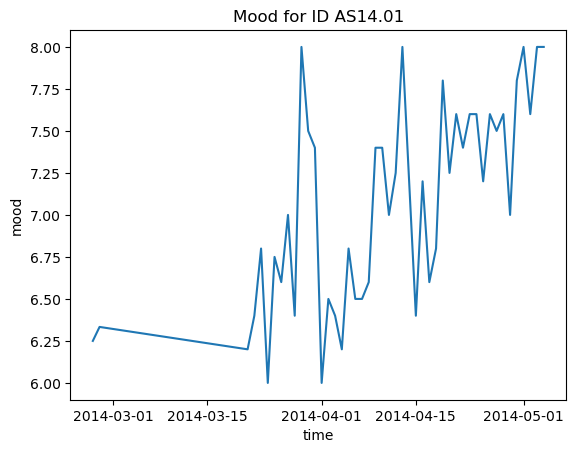

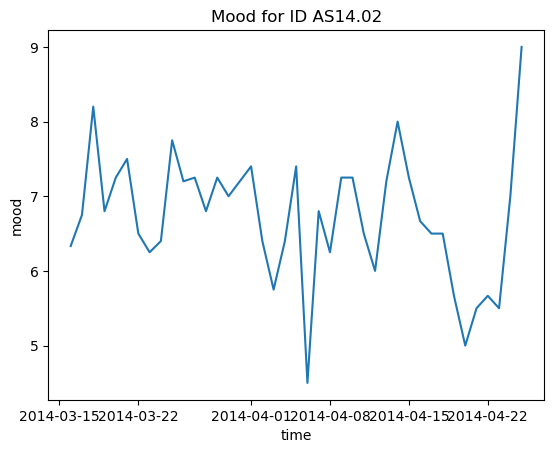

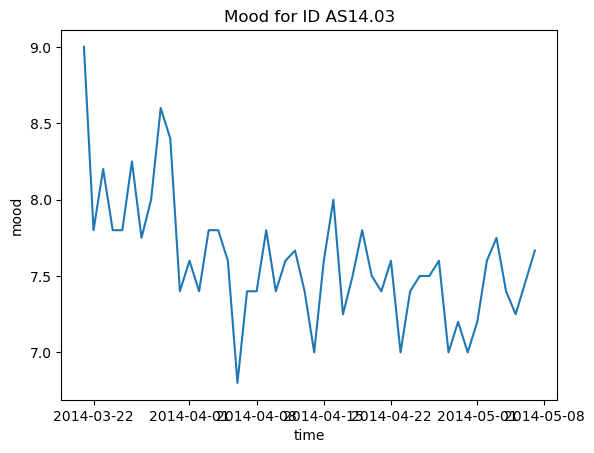

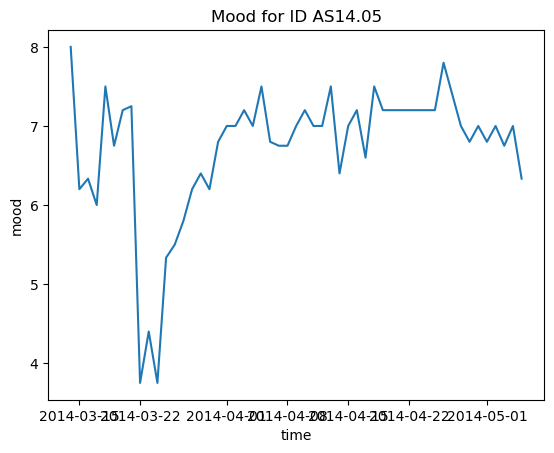

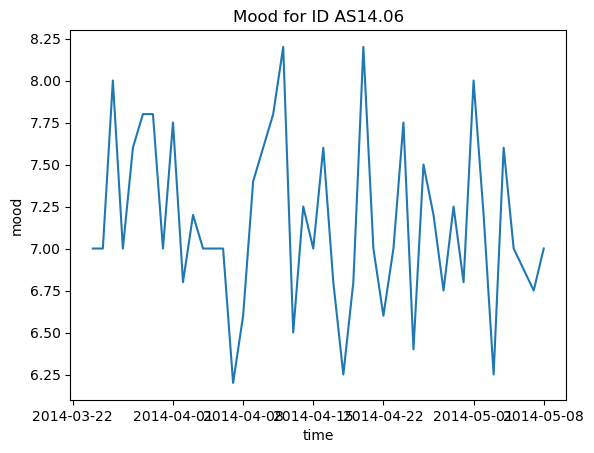

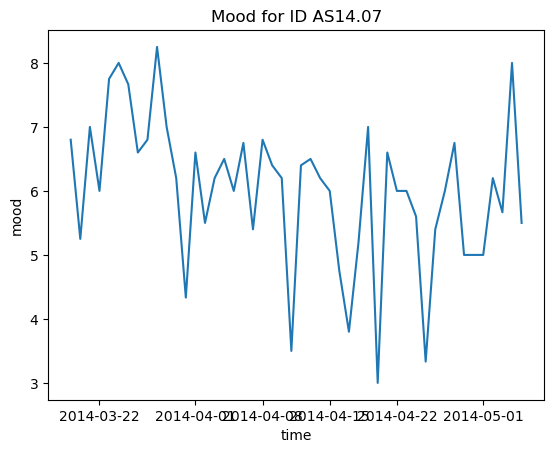

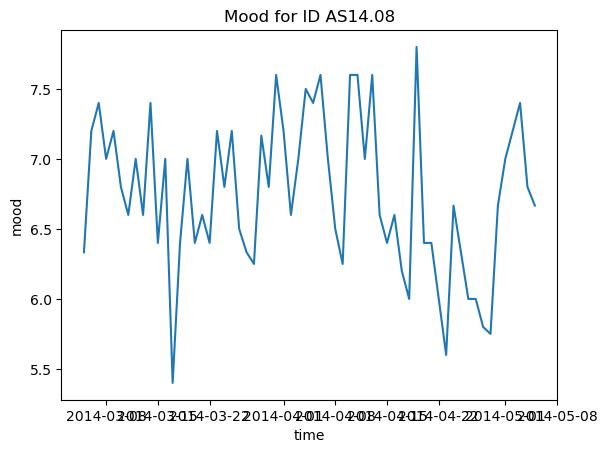

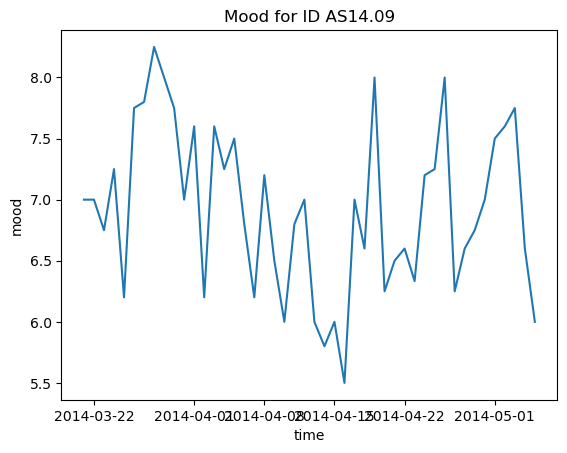

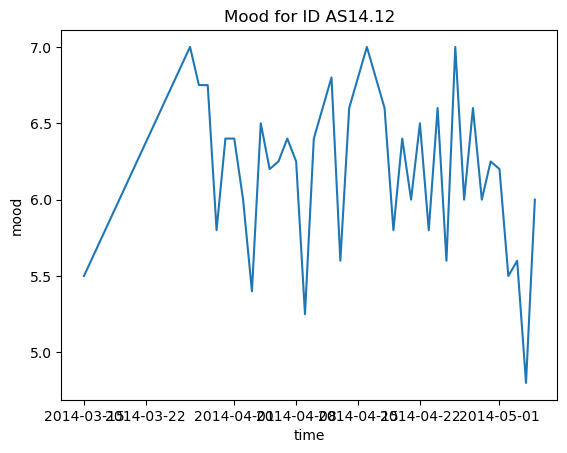

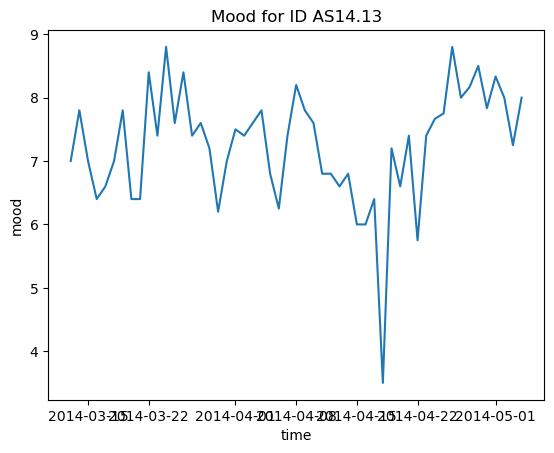

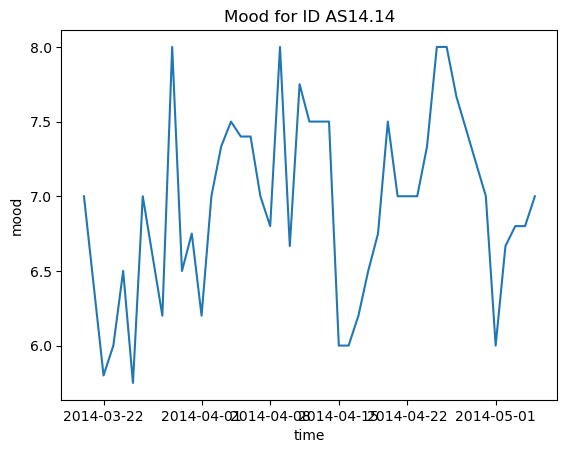

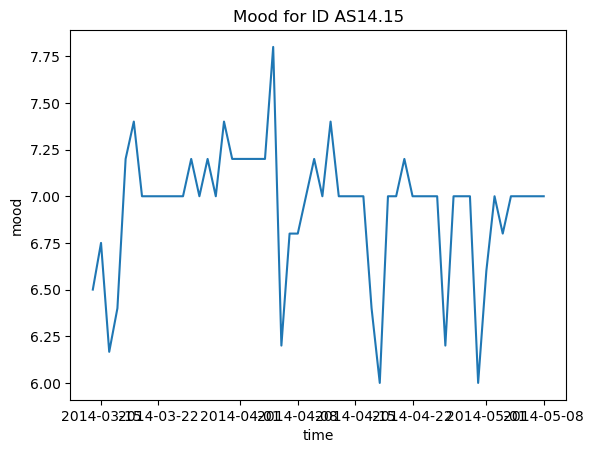

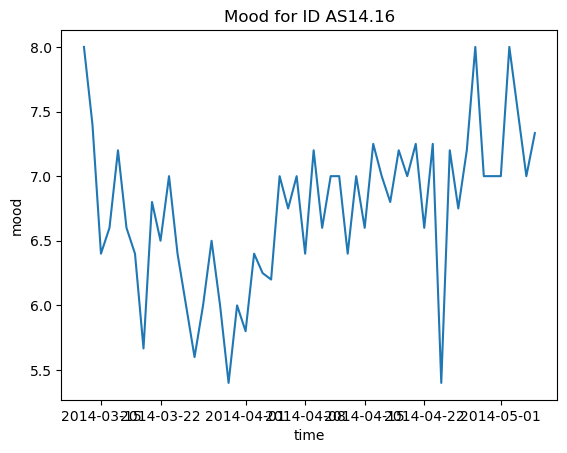

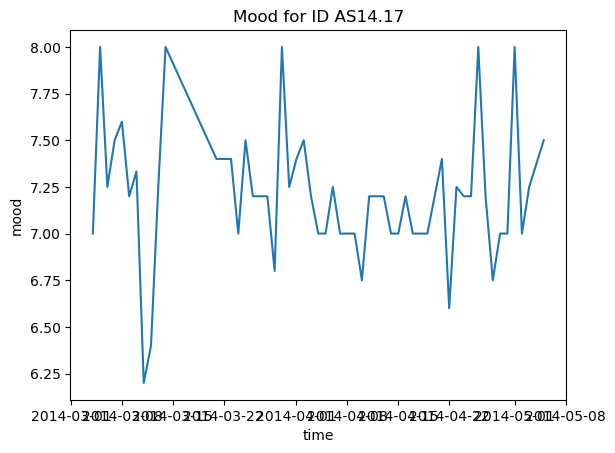

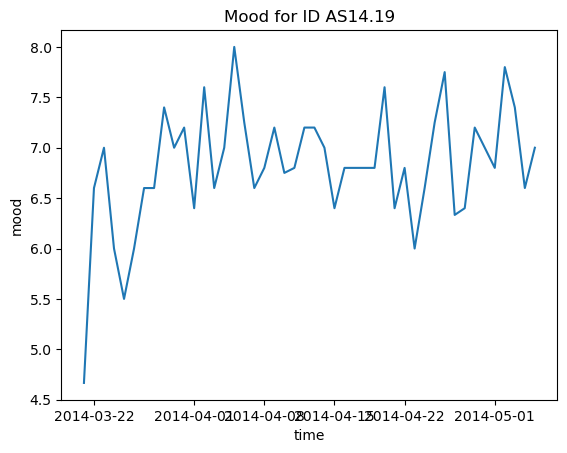

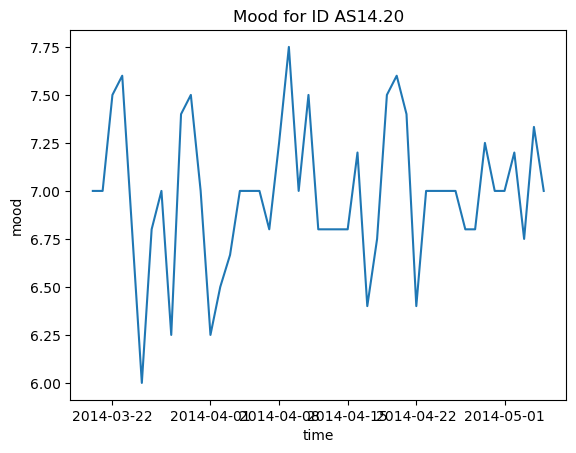

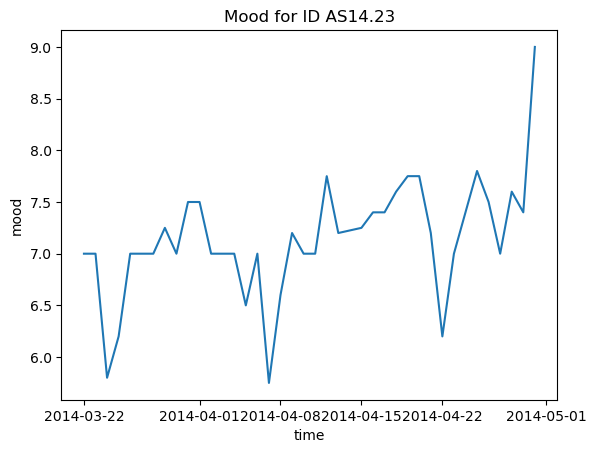

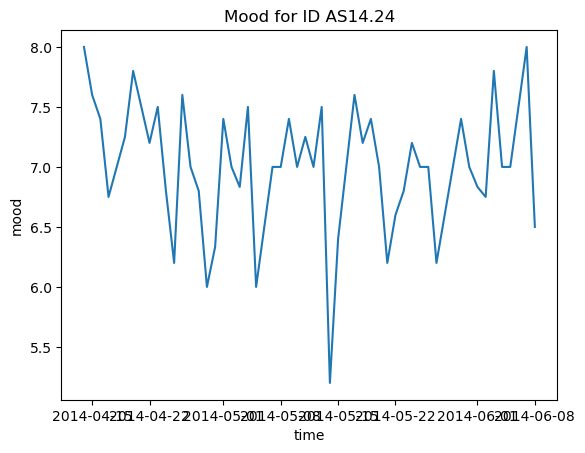

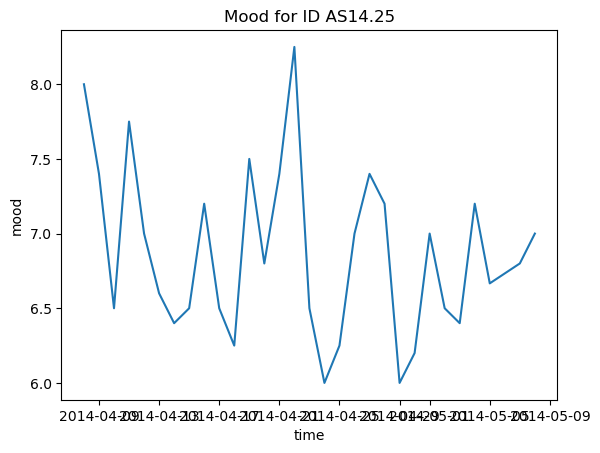

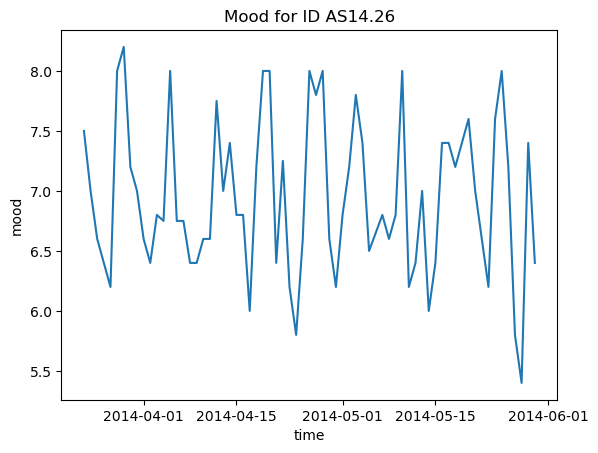

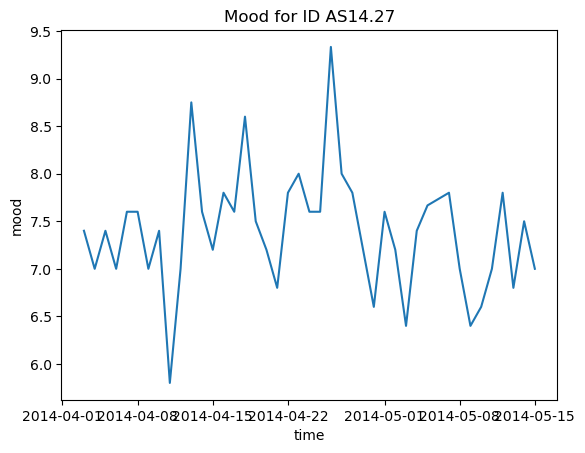

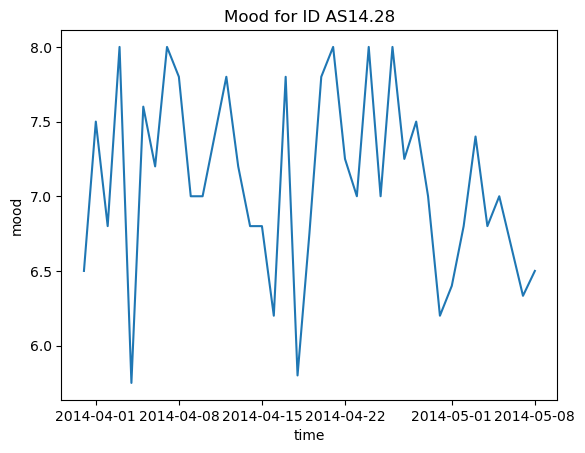

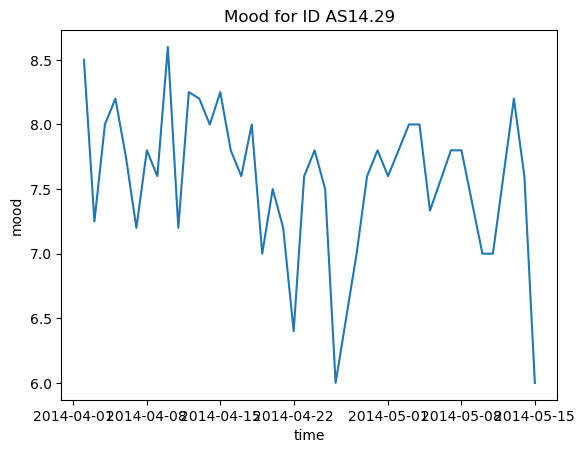

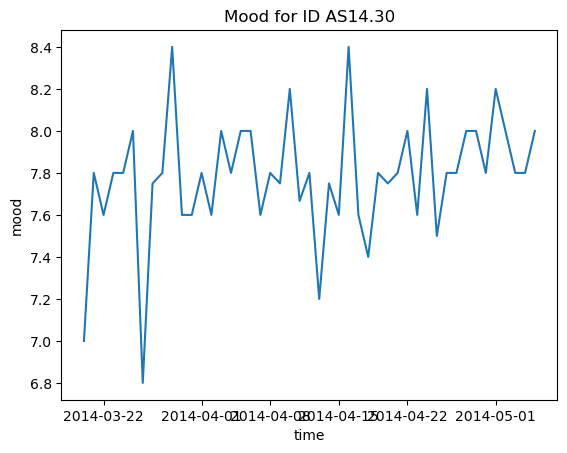

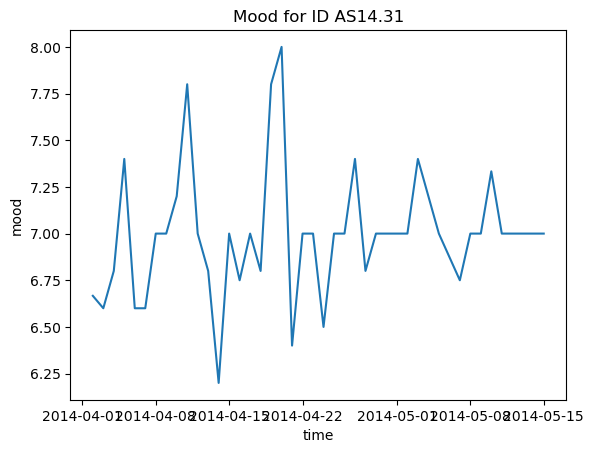

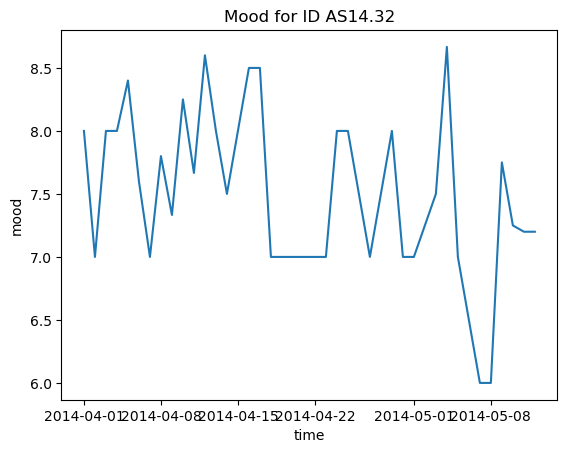

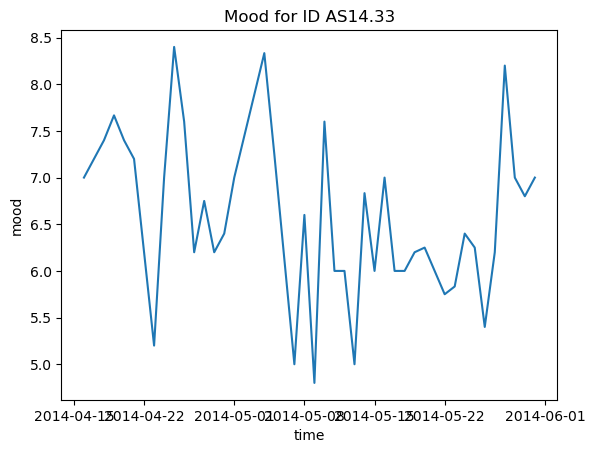

In [7]:
# Create separate plots for each id
for id in pivoted['id'].unique():
    id_data = pivoted[pivoted['id'] == id]
    sns.lineplot(x='time', y='mood', data=id_data)
    plt.title('Mood for ID ' + str(id))
    plt.show()

In [8]:
fill_values = {}
for col in pivoted.columns:
    if col not in ['mood', 'circumplex.valence', 'circumplex.arousal']:
        fill_values[col] = 0
pivoted.fillna(value=fill_values, inplace=True)
pivoted

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,NaN,NaN,NaN,0.000000,0.0
1,AS14.01,2014-02-18,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,NaN,NaN,NaN,0.000000,0.0
2,AS14.01,2014-02-19,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,NaN,NaN,NaN,0.000000,1.0
3,AS14.01,2014-02-20,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,NaN,NaN,NaN,0.000000,1.0
4,AS14.01,2014-02-21,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,AS14.33,2014-05-27,0.012704,8.545776,59.382943,62.347000,0.0,0.0,0.000000,17.835750,...,0.000000,0.000000,18.724333,0.0,1.0,-0.600000,0.4,6.2,113.607750,1.0
1969,AS14.33,2014-05-28,0.103301,9.590398,37.238750,43.907571,0.0,0.0,44.738625,27.891895,...,0.000000,0.000000,5.111000,0.0,1.0,0.000000,1.2,8.2,113.657683,1.0
1970,AS14.33,2014-05-29,0.169354,6.452161,54.388125,68.369000,0.0,0.0,0.000000,9.734000,...,0.939000,0.000000,1.599500,0.0,1.0,-1.333333,1.0,7.0,118.978033,1.0
1971,AS14.33,2014-05-30,0.192901,14.776845,46.412278,37.174286,0.0,0.0,0.000000,10.522000,...,37.594571,2.690667,15.521667,0.0,1.0,-0.800000,-0.4,6.8,86.342245,0.0


In [9]:
missing_values = pivoted.isna().sum()
total_values = pivoted.count()
missing_total_values = pd.concat([missing_values, total_values], axis=1, keys=['Missing Values', 'Total Values'])
print(missing_total_values)

                      Missing Values  Total Values
variable                                          
id                                 0          1973
time                               0          1973
activity                           0          1973
appCat.builtin                     0          1973
appCat.communication               0          1973
appCat.entertainment               0          1973
appCat.finance                     0          1973
appCat.game                        0          1973
appCat.office                      0          1973
appCat.other                       0          1973
appCat.social                      0          1973
appCat.travel                      0          1973
appCat.unknown                     0          1973
appCat.utilities                   0          1973
appCat.weather                     0          1973
call                               0          1973
circumplex.arousal               705          1268
circumplex.valence             

In [10]:
print(sum(pivoted['mood'].isna() == pivoted['circumplex.valence'].isna()))


1971


In [11]:
print(sum(pivoted['mood'].isna() == pivoted['circumplex.arousal'].isna()))

1973


In [12]:
pivoted.describe()

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
count,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1268.000000,1266.000000,1268.000000,1973.000000,1973.000000
mean,0.072257,15.592107,27.280625,40.783422,2.692675,15.265598,5.961332,12.192930,38.482870,11.473833,8.448042,3.807996,1.234437,0.678155,-0.103851,0.687112,6.990063,51.390391,0.372022
std,0.096271,60.164585,36.242188,107.958254,11.209689,92.425644,42.107824,32.315536,106.510027,50.618343,65.700078,16.391423,7.039236,0.467302,0.662715,0.434602,0.736465,68.434345,0.483467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-1.250000,3.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,0.400000,6.600000,0.000000,0.000000
50%,0.037314,6.811747,23.053708,0.000000,0.000000,0.000000,0.000000,7.612250,1.007000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.800000,7.000000,38.422620,0.000000
75%,0.111957,14.659960,43.160333,34.749500,0.000000,0.000000,0.000000,12.819400,54.091533,0.000000,0.000000,0.000000,0.000000,1.000000,0.400000,1.000000,7.500000,75.562566,1.000000
max,0.566171,1399.054714,522.718000,1650.744000,149.181000,2562.907000,1494.864000,722.752200,3759.177625,1758.019333,2239.937000,363.429000,183.468500,1.000000,2.000000,2.000000,9.333333,960.503111,1.000000


In [13]:
groups = pivoted.groupby('id')
all_groups_consecutive_TS = pd.DataFrame()
for group_id, group_df in groups:
    group_df.reset_index()
    mask = group_df["mood"].isnull()
    group_df["consecutive_missing"] = (~mask).cumsum()
    counts = group_df[mask].groupby("consecutive_missing").size()
    groups_to_remove = counts[counts > 2].index
    consecutive_TS = group_df[~group_df["consecutive_missing"].isin(groups_to_remove)]
    consecutive_TS.drop("consecutive_missing", axis=1, inplace=True)
    consecutive_TS = consecutive_TS.reset_index()
    prev_time = None
    for index, row in consecutive_TS.iterrows():
        if prev_time is None:
            prev_time = row['time']
            continue
        time_diff = (row['time'] - prev_time).days

        if time_diff >= 5:
            consecutive_TS.drop(index=index-1, inplace=True)

        prev_time = row['time']
    consecutive_TS["id"] = group_id
    all_groups_consecutive_TS = pd.concat([all_groups_consecutive_TS, consecutive_TS])

all_groups_consecutive_TS = all_groups_consecutive_TS.reset_index(drop=True)
all_groups_consecutive_TS = all_groups_consecutive_TS.drop(columns=['index'])
all_groups_consecutive_TS

C:\Users\a-v-d\AppData\Local\Temp\ipykernel_3976\3237744924.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consecutive_TS.drop("consecutive_missing", axis=1, inplace=True)
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_3976\3237744924.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consecutive_TS.drop("consecutive_missing", axis=1, inplace=True)
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_3976\3237744924.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-03-21,0.134050,14.269173,55.095526,53.024000,6.193000,0.0,57.402000,29.968875,...,70.418846,0.000000,23.029000,0.000,1.0,0.200000,0.2,6.20,153.665872,0.0
1,AS14.01,2014-03-22,0.236880,7.781160,51.697062,46.662000,7.025333,0.0,0.000000,14.020429,...,37.305000,0.000000,39.207000,0.000,1.0,0.600000,0.5,6.40,47.613651,1.0
2,AS14.01,2014-03-23,0.142741,12.134396,53.442031,31.448667,10.850750,0.0,0.000000,12.137167,...,0.000000,0.000000,30.086000,30.386,0.0,0.200000,0.8,6.80,67.067644,0.0
3,AS14.01,2014-03-24,0.078961,4.982506,47.541687,122.121375,5.684333,0.0,3.010000,11.093000,...,83.961000,0.000000,89.366000,0.000,1.0,0.800000,0.0,6.00,76.772199,0.0
4,AS14.01,2014-03-25,0.098374,10.026874,69.437507,34.103000,10.763500,0.0,0.000000,29.803167,...,0.000000,29.402875,22.289300,0.000,0.0,0.500000,0.5,6.75,169.097283,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,AS14.33,2014-05-27,0.012704,8.545776,59.382943,62.347000,0.000000,0.0,0.000000,17.835750,...,0.000000,0.000000,18.724333,0.000,1.0,-0.600000,0.4,6.20,113.607750,1.0
1290,AS14.33,2014-05-28,0.103301,9.590398,37.238750,43.907571,0.000000,0.0,44.738625,27.891895,...,0.000000,0.000000,5.111000,0.000,1.0,0.000000,1.2,8.20,113.657683,1.0
1291,AS14.33,2014-05-29,0.169354,6.452161,54.388125,68.369000,0.000000,0.0,0.000000,9.734000,...,0.939000,0.000000,1.599500,0.000,1.0,-1.333333,1.0,7.00,118.978033,1.0
1292,AS14.33,2014-05-30,0.192901,14.776845,46.412278,37.174286,0.000000,0.0,0.000000,10.522000,...,37.594571,2.690667,15.521667,0.000,1.0,-0.800000,-0.4,6.80,86.342245,0.0


In [14]:
df_no_outliers = all_groups_consecutive_TS.copy()

# Loop through all columns except for 'id', 'time', and 'variable'
for col in df_no_outliers.columns:
    if col not in ['id', 'time', 'variable', 'call', 'sms']:
        med = df_no_outliers[col].median()
        mad = (df_no_outliers[col] - med).abs().median()
        # Replace outliers with NA
        threshold = 3
        outliers = ((df_no_outliers[col] - med).abs() > threshold * mad)
        df_no_outliers.loc[outliers, col] = np.nan

df_no_outliers


variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-03-21,0.134050,14.269173,55.095526,53.024000,NaN,0.0,NaN,NaN,...,NaN,0.0,NaN,0.0,1.0,0.2,NaN,6.20,NaN,0.0
1,AS14.01,2014-03-22,0.236880,7.781160,51.697062,46.662000,NaN,0.0,0.0,14.020429,...,NaN,0.0,NaN,0.0,1.0,0.6,0.5,6.40,47.613651,1.0
2,AS14.01,2014-03-23,0.142741,12.134396,53.442031,31.448667,NaN,0.0,0.0,12.137167,...,0.0,0.0,NaN,NaN,0.0,0.2,0.8,6.80,67.067644,0.0
3,AS14.01,2014-03-24,0.078961,4.982506,47.541687,NaN,NaN,0.0,NaN,11.093000,...,NaN,0.0,NaN,0.0,1.0,0.8,NaN,6.00,76.772199,0.0
4,AS14.01,2014-03-25,0.098374,10.026874,69.437507,34.103000,NaN,0.0,0.0,NaN,...,0.0,NaN,NaN,0.0,0.0,0.5,0.5,6.75,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,AS14.33,2014-05-27,0.012704,8.545776,59.382943,NaN,0.0,0.0,0.0,17.835750,...,0.0,0.0,NaN,0.0,1.0,-0.6,0.4,6.20,113.607750,1.0
1290,AS14.33,2014-05-28,0.103301,9.590398,37.238750,43.907571,0.0,0.0,NaN,NaN,...,0.0,0.0,NaN,0.0,1.0,0.0,1.2,8.20,113.657683,1.0
1291,AS14.33,2014-05-29,0.169354,6.452161,54.388125,NaN,0.0,0.0,0.0,9.734000,...,NaN,0.0,NaN,0.0,1.0,NaN,1.0,7.00,118.978033,1.0
1292,AS14.33,2014-05-30,0.192901,14.776845,46.412278,37.174286,0.0,0.0,0.0,10.522000,...,NaN,NaN,NaN,0.0,1.0,-0.8,NaN,6.80,86.342245,0.0


In [15]:
df_no_outliers = df_no_outliers.fillna(df_no_outliers.median())
df_no_outliers
#imputer = SimpleImputer(strategy='median')
#cols_to_impute = ['mood', 'circumplex.valence', 'circumplex.arousal']
#pivoted[cols_to_impute] = imputer.fit_transform(pivoted[cols_to_impute])
#pivoted.describe()

C:\Users\a-v-d\AppData\Local\Temp\ipykernel_3976\859918292.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_no_outliers = df_no_outliers.fillna(df_no_outliers.median())
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_3976\859918292.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_no_outliers = df_no_outliers.fillna(df_no_outliers.median())


variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-03-21,0.134050,14.269173,55.095526,53.024000,0.0,0.0,0.0,9.737400,...,0.0,0.0,0.0,0.0,1.0,0.2,0.8,6.20,57.258304,0.0
1,AS14.01,2014-03-22,0.236880,7.781160,51.697062,46.662000,0.0,0.0,0.0,14.020429,...,0.0,0.0,0.0,0.0,1.0,0.6,0.5,6.40,47.613651,1.0
2,AS14.01,2014-03-23,0.142741,12.134396,53.442031,31.448667,0.0,0.0,0.0,12.137167,...,0.0,0.0,0.0,0.0,0.0,0.2,0.8,6.80,67.067644,0.0
3,AS14.01,2014-03-24,0.078961,4.982506,47.541687,3.086726,0.0,0.0,0.0,11.093000,...,0.0,0.0,0.0,0.0,1.0,0.8,0.8,6.00,76.772199,0.0
4,AS14.01,2014-03-25,0.098374,10.026874,69.437507,34.103000,0.0,0.0,0.0,9.737400,...,0.0,0.0,0.0,0.0,0.0,0.5,0.5,6.75,57.258304,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,AS14.33,2014-05-27,0.012704,8.545776,59.382943,3.086726,0.0,0.0,0.0,17.835750,...,0.0,0.0,0.0,0.0,1.0,-0.6,0.4,6.20,113.607750,1.0
1290,AS14.33,2014-05-28,0.103301,9.590398,37.238750,43.907571,0.0,0.0,0.0,9.737400,...,0.0,0.0,0.0,0.0,1.0,0.0,1.2,8.20,113.657683,1.0
1291,AS14.33,2014-05-29,0.169354,6.452161,54.388125,3.086726,0.0,0.0,0.0,9.734000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,7.00,118.978033,1.0
1292,AS14.33,2014-05-30,0.192901,14.776845,46.412278,37.174286,0.0,0.0,0.0,10.522000,...,0.0,0.0,0.0,0.0,1.0,-0.8,0.8,6.80,86.342245,0.0


In [16]:
std = df_no_outliers.std()
non_zero_std_cols = std[std != 0].index
non_zero_std_cols = non_zero_std_cols.insert(0, 'id')
df_no_outliers = df_no_outliers[non_zero_std_cols]
df_no_outliers.describe()

C:\Users\a-v-d\AppData\Local\Temp\ipykernel_3976\3497479661.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = df_no_outliers.std()


variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.other,appCat.social,call,circumplex.arousal,circumplex.valence,mood,screen,sms
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,0.082458,10.697522,34.184167,9.339434,9.482484,41.237079,0.581917,-0.059518,0.804212,7.039464,59.028279,0.333849
std,0.056609,6.170422,18.237308,14.186890,4.992480,37.027179,0.493435,0.554642,0.237062,0.532937,31.927906,0.471769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,0.250000,5.800000,0.000000,0.000000
25%,0.039270,6.878691,23.448597,0.000000,7.837700,4.917500,0.000000,-0.400000,0.666667,6.750000,39.136224,0.000000
50%,0.080748,10.004675,34.463118,3.086726,9.737400,36.115308,1.000000,0.000000,0.800000,7.000000,57.258304,0.000000
75%,0.116248,13.975932,46.411465,11.954716,12.093875,63.580813,1.000000,0.250000,1.000000,7.400000,77.483979,1.000000
max,0.239025,28.092455,77.773435,58.180333,22.306700,145.257542,1.000000,1.200000,1.400000,8.200000,143.059197,1.000000


In [17]:
df_no_outliers_mean = all_groups_consecutive_TS.copy()

# Loop through all columns except for 'id', 'time', and 'variable'
for col in df_no_outliers_mean.columns:
    if col not in ['id', 'time', 'variable', 'call', 'sms']:
        mean = df_no_outliers_mean[col].mean()
        std = df_no_outliers_mean[col].std()
        # Replace outliers with NA
        threshold = 3
        outliers = ((df_no_outliers_mean[col] - mean).abs() > threshold * std)
        df_no_outliers_mean.loc[outliers, col] = np.nan


In [18]:
df_no_outliers_mean = df_no_outliers_mean.fillna(df_no_outliers_mean.mean())
df_no_outliers_mean.describe()

C:\Users\a-v-d\AppData\Local\Temp\ipykernel_3976\882429591.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_no_outliers_mean = df_no_outliers_mean.fillna(df_no_outliers_mean.mean())
C:\Users\a-v-d\AppData\Local\Temp\ipykernel_3976\882429591.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_no_outliers_mean = df_no_outliers_mean.fillna(df_no_outliers_mean.mean())


variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,0.101963,17.856416,38.462976,48.922256,2.328972,10.875099,5.569150,14.997101,52.105440,14.161318,7.075058,3.857585,0.961175,0.581917,-0.108082,0.694596,7.017174,72.095618,0.333849
std,0.086090,23.622630,24.977112,75.991279,6.917377,39.253965,17.561988,16.989305,57.049644,26.523592,22.571139,8.165578,4.037016,0.493435,0.649103,0.396228,0.656488,51.902582,0.471769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-0.600000,4.800000,0.000000,0.000000
25%,0.039270,6.878691,23.448597,0.000000,0.000000,0.000000,0.000000,7.837700,4.917500,0.000000,0.000000,0.000000,0.000000,0.000000,-0.500000,0.400000,6.600000,39.136224,0.000000
50%,0.087479,11.542071,36.618566,14.602405,0.000000,0.000000,0.000000,10.876200,40.337147,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.800000,7.000000,62.746353,0.000000
75%,0.136321,19.443362,50.081039,63.325758,0.000000,0.000000,0.000000,15.959979,74.375404,22.113000,0.000000,4.080250,0.000000,1.000000,0.333333,1.000000,7.475000,91.983109,1.000000
max,0.402646,238.640053,152.860308,437.264000,43.849000,356.397000,161.499000,132.562833,427.776000,185.811167,219.626500,63.916857,26.830000,1.000000,1.800000,1.800000,9.000000,290.609021,1.000000


In [19]:
df_no_outliers.describe()

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.other,appCat.social,call,circumplex.arousal,circumplex.valence,mood,screen,sms
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,0.082458,10.697522,34.184167,9.339434,9.482484,41.237079,0.581917,-0.059518,0.804212,7.039464,59.028279,0.333849
std,0.056609,6.170422,18.237308,14.186890,4.992480,37.027179,0.493435,0.554642,0.237062,0.532937,31.927906,0.471769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,0.250000,5.800000,0.000000,0.000000
25%,0.039270,6.878691,23.448597,0.000000,7.837700,4.917500,0.000000,-0.400000,0.666667,6.750000,39.136224,0.000000
50%,0.080748,10.004675,34.463118,3.086726,9.737400,36.115308,1.000000,0.000000,0.800000,7.000000,57.258304,0.000000
75%,0.116248,13.975932,46.411465,11.954716,12.093875,63.580813,1.000000,0.250000,1.000000,7.400000,77.483979,1.000000
max,0.239025,28.092455,77.773435,58.180333,22.306700,145.257542,1.000000,1.200000,1.400000,8.200000,143.059197,1.000000


In [20]:
df_no_outliers.describe()

variable,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.other,appCat.social,call,circumplex.arousal,circumplex.valence,mood,screen,sms
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,0.082458,10.697522,34.184167,9.339434,9.482484,41.237079,0.581917,-0.059518,0.804212,7.039464,59.028279,0.333849
std,0.056609,6.170422,18.237308,14.186890,4.992480,37.027179,0.493435,0.554642,0.237062,0.532937,31.927906,0.471769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.200000,0.250000,5.800000,0.000000,0.000000
25%,0.039270,6.878691,23.448597,0.000000,7.837700,4.917500,0.000000,-0.400000,0.666667,6.750000,39.136224,0.000000
50%,0.080748,10.004675,34.463118,3.086726,9.737400,36.115308,1.000000,0.000000,0.800000,7.000000,57.258304,0.000000
75%,0.116248,13.975932,46.411465,11.954716,12.093875,63.580813,1.000000,0.250000,1.000000,7.400000,77.483979,1.000000
max,0.239025,28.092455,77.773435,58.180333,22.306700,145.257542,1.000000,1.200000,1.400000,8.200000,143.059197,1.000000


In [22]:
groups = df_no_outliers.groupby('id')
for group_id, group_df in groups:
    filename = f'{group_id}_part2.csv'
    group_df.to_csv(filename, index=False)